In [3]:
%ls

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: 7A70-C0C1

 C:\Users\qwuni\uos_bigdata 디렉터리

2023-08-15  오후 07:19    <DIR>          .
2023-08-13  오후 04:11    <DIR>          ..
2023-08-15  오후 07:19    <DIR>          .ipynb_checkpoints
2022-03-06  오후 04:49         4,730,750 [Kaggle] 01. 데이터 추출 _ EDA _ 파생변수 (5).ipynb
2023-08-15  오후 07:17         4,568,459 2023 modeling(cat).ipynb
2022-02-18  오후 10:57           783,369 2월17일 목요일 한서준 전처리+결정트리 최종본.ipynb
2022-02-05  오후 06:44           656,869 day_care_center.csv
2022-02-12  오후 09:40           524,407 EDA.ipynb
2022-02-05  오후 11:08           484,996 EDA-Copy1.ipynb
2022-02-16  오후 04:40       100,099,423 final_train.csv
2022-02-18  오후 12:35       100,008,059 final_train_1.csv
2022-02-16  오후 04:40        86,736,869 final_train_labelencoding.csv
2022-02-19  오전 08:46           382,984 LGBM_reg5.ipynb
2023-08-15  오후 07:12         4,568,459 modeling(cat).ipynb
2022-02-19  오전 09:44           427,452 modeling(xgb).ipynb
2022-02-05  오후 06:44           162,595 park.

In [ ]:
import pandas as pd

# 1. 데이터 불러오기

In [5]:
try:
    df_train= pd.read_csv('/content/drive/MyDrive/train.csv')
    df_test= pd.read_csv('/content/drive/MyDrive/test.csv')
except:
    df_train= pd.read_csv('train.csv')
    df_test= pd.read_csv('test.csv')


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

plt.style.use('seaborn')
sns.set(font_scale=1.5) # 이 두줄은 본 필자가 항상 쓰는 방법입니다. matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고, 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편합니다.

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

C:\Temp\ipykernel_30812\9053302.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


In [7]:
df_train.shape

(1216553, 13)

In [8]:
df_test.shape

(5463, 12)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1216553 entries, 0 to 1216552
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   transaction_id          1216553 non-null  int64  
 1   apartment_id            1216553 non-null  int64  
 2   city                    1216553 non-null  object 
 3   dong                    1216553 non-null  object 
 4   jibun                   1216553 non-null  object 
 5   apt                     1216553 non-null  object 
 6   addr_kr                 1216553 non-null  object 
 7   exclusive_use_area      1216553 non-null  float64
 8   year_of_completion      1216553 non-null  int64  
 9   transaction_year_month  1216553 non-null  int64  
 10  transaction_date        1216553 non-null  object 
 11  floor                   1216553 non-null  int64  
 12  transaction_real_price  1216553 non-null  int64  
dtypes: float64(1), int64(6), object(6)
memory usage: 120.7+ M

In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5463 entries, 0 to 5462
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   transaction_id          5463 non-null   int64  
 1   apartment_id            5463 non-null   int64  
 2   city                    5463 non-null   object 
 3   dong                    5463 non-null   object 
 4   jibun                   5463 non-null   object 
 5   apt                     5463 non-null   object 
 6   addr_kr                 5463 non-null   object 
 7   exclusive_use_area      5463 non-null   float64
 8   year_of_completion      5463 non-null   int64  
 9   transaction_year_month  5463 non-null   int64  
 10  transaction_date        5463 non-null   object 
 11  floor                   5463 non-null   int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 512.3+ KB


In [9]:
df_train['city'].value_counts()

서울특별시    742285
부산광역시    474268
Name: city, dtype: int64

### 부산광역시 데이터 제외

In [10]:
busan = df_train[df_train['city'] == '부산광역시'].index
df_train=df_train.drop(busan)
df_train.head()

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000


In [11]:
# 데이터 1/3만큼 축소하기
df_train.shape

(742285, 13)

### 변수명
- transaction_id : 아파트 거래에 대한 유니크한 아이디
- apartment_id : 아파트 아이디
- city : 도시
- dong : 동
- jibun : 지번
- apt : 아파트단지 이름
- addr_kr : 주소
- exclusive_use_area : 전용면적
- year_of_completion : 설립일자
- transaction_year_month : 거래년월
- transaction_date : 거래날짜
- floor : 층
- transaction_real_price : 실거래가 (target variable)

In [ ]:
df_train.head(15)

,transaction_id,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
0,0,7622,서울특별시,신교동,6-13,신현(101동),신교동 6-13 신현(101동),84.82,2002,200801,21~31,2,37500
1,1,5399,서울특별시,필운동,142,사직파크맨션,필운동 142 사직파크맨션,99.17,1973,200801,1~10,6,20000
2,2,3578,서울특별시,필운동,174-1,두레엘리시안,필운동 174-1 두레엘리시안,84.74,2007,200801,1~10,6,38500
3,3,10957,서울특별시,내수동,95,파크팰리스,내수동 95 파크팰리스,146.39,2003,200801,11~20,15,118000
4,4,10639,서울특별시,내수동,110-15,킹스매너,내수동 110-15 킹스매너,194.43,2004,200801,21~31,3,120000
5,5,12536,서울특별시,인의동,48-2,효성쥬얼리시티,인의동 48-2 효성쥬얼리시티,106.81,2006,200801,1~10,16,67000
6,6,12536,서울특별시,인의동,48-2,효성쥬얼리시티,인의동 48-2 효성쥬얼리시티,92.81,2006,200801,1~10,7,50270
7,7,12536,서울특별시,인의동,48-2,효성쥬얼리시티,인의동 48-2 효성쥬얼리시티,98.39,2006,200801,11~20,7,46000
8,8,12536,서울특별시,인의동,48-2,효성쥬얼리시티,인의동 48-2 효성쥬얼리시티,84.64,2006,200801,21~31,15,35368
9,9,12536,서울특별시,인의동,48-2,효성쥬얼리시티,인의동 48-2 효성쥬얼리시티,84.98,2006,200801,21~31,7,46800


In [12]:
df_train.isnull().sum()  # 컬럼별 결측값 개수 체크

transaction_id            0
apartment_id              0
city                      0
dong                      0
jibun                     0
apt                       0
addr_kr                   0
exclusive_use_area        0
year_of_completion        0
transaction_year_month    0
transaction_date          0
floor                     0
transaction_real_price    0
dtype: int64

In [13]:
df_test.isnull().sum()

transaction_id            0
apartment_id              0
city                      0
dong                      0
jibun                     0
apt                       0
addr_kr                   0
exclusive_use_area        0
year_of_completion        0
transaction_year_month    0
transaction_date          0
floor                     0
dtype: int64

# 2. EDA

### 2.1 Target Variable (Dependent Variable)

### transaction_real_price : 실거래가

In [14]:
df_train['transaction_real_price'].describe()  # 평균 : 38227.69 / min : 100 / max : 820000

count    742285.000000
mean      49169.779317
std       33868.323394
min         350.000000
25%       29000.000000
50%       40000.000000
75%       58000.000000
max      820000.000000
Name: transaction_real_price, dtype: float64

transaction_real_price -> Skewness: 3.385371, Kurtosis: 23.499056


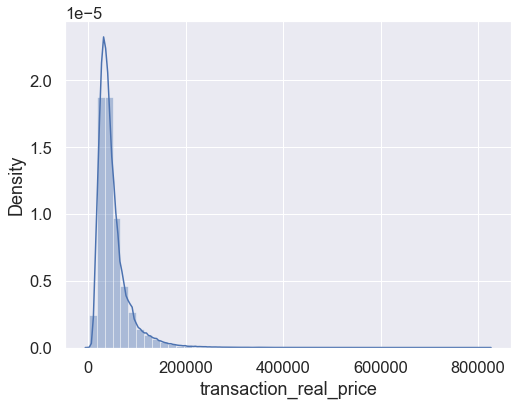

In [ ]:
f, ax = plt.subplots(figsize = (8,6))
sns.distplot(df_train['transaction_real_price'])
print("%s -> Skewness: %f, Kurtosis: %f" %  ('transaction_real_price',df_train['transaction_real_price'].skew(), 
                                                     df_train['transaction_real_price'].kurt()))

### columns 상관관계

<Axes: >

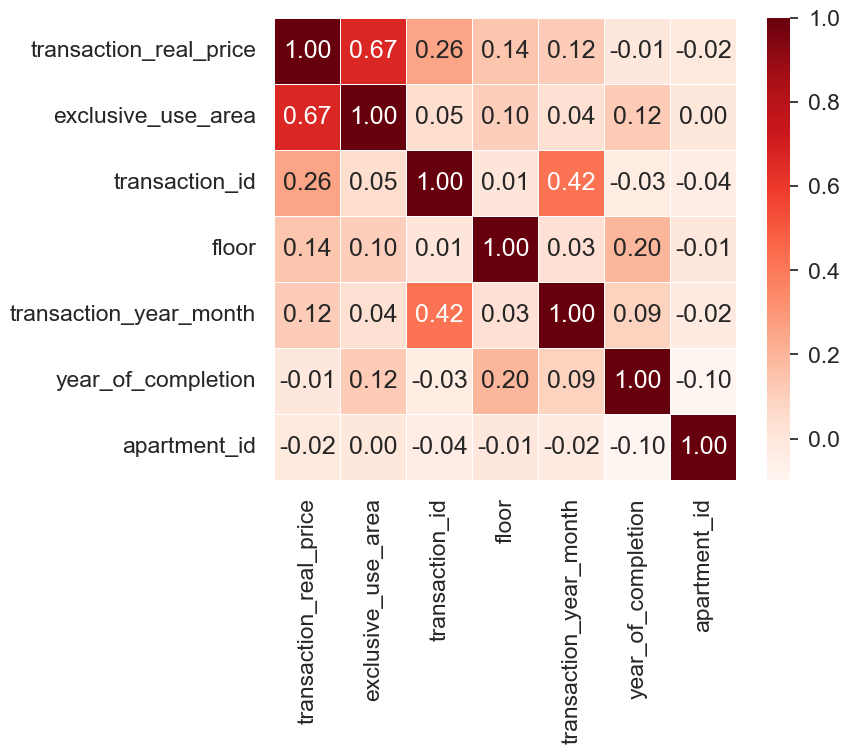

In [15]:
#상관관계 확인
k=df_train.shape[1] #히트맵 변수 갯수
corrmat = df_train.corr() #변수간의 상관관계
cols = corrmat.nlargest(k, 'transaction_real_price')['transaction_real_price'].index #price기준으로 제일 큰순서대로 20개를 뽑아냄
cm = np.corrcoef(df_train[cols].values.T)
f, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(data = cm, annot=True, square=True, fmt = '.2f', linewidths=.5, cmap='Reds', 
            yticklabels = cols.values, xticklabels = cols.values)

### 2.2 Numeric variable (feature)

### transaction_id & apartment_id : 거래 id & 아파트 id

In [ ]:
len(df_train['apartment_id'].unique())

8251

In [ ]:
# transation_id는 예측에 필요 없으므로 삭제
train_id = df_train['transaction_id']  
df_train = df_train.drop('transaction_id', axis=1)
test_id = df_test['transaction_id']
df_test = df_test.drop('transaction_id', axis=1)

### floor : 층

floor -> Skewness: 1.103358, Kurtosis: 2.448246


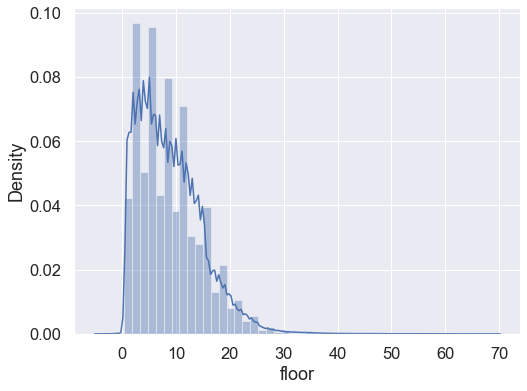

In [ ]:
# floor의 분포
f, ax = plt.subplots(figsize = (8,6))
sns.distplot(df_train['floor'])

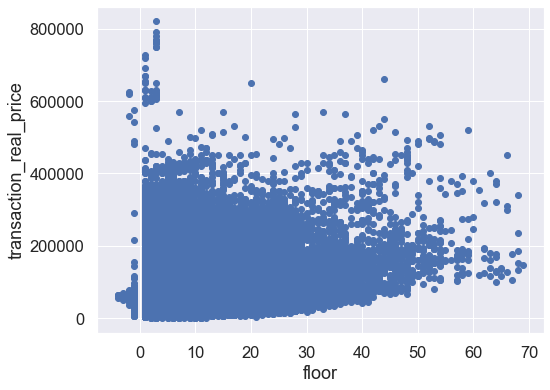

In [ ]:
# floor와 real_price와 의 상관관계
f, ax = plt.subplots(figsize = (8,6))
plt.scatter(df_train['floor'], df_train['transaction_real_price'])
plt.xlabel('floor')
plt.ylabel('transaction_real_price')
plt.show()

### exclusive_use_area : 전용 면적

In [ ]:
df_train['exclusive_use_area'].describe()  # 평균 : 77.906753 / min : 11.9559 / max : 424.32

count    742285.000000
mean         77.906753
std          28.691683
min          11.955900
25%          59.740000
50%          83.160000
75%          84.960000
max         424.320000
Name: exclusive_use_area, dtype: float64

exclusive_use_area -> Skewness: 1.263132, Kurtosis: 3.775781


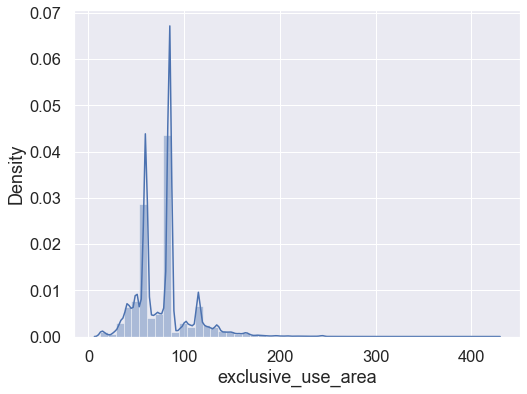

In [ ]:
f, ax = plt.subplots(figsize = (8,6))
sns.distplot(df_train['exclusive_use_area'])

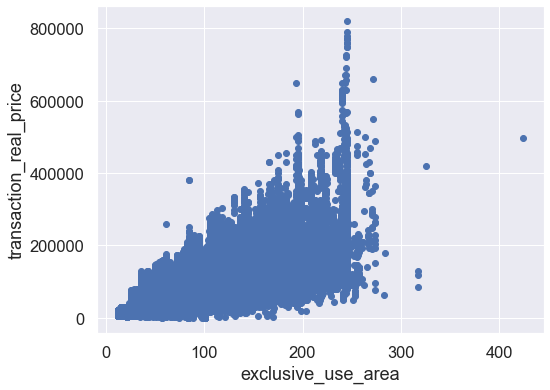

In [ ]:
f, ax = plt.subplots(figsize = (8,6))
plt.scatter(df_train['exclusive_use_area'], df_train['transaction_real_price'])
plt.xlabel('exclusive_use_area')
plt.ylabel('transaction_real_price')
plt.show()

In [ ]:
# 이상치로 보이는 것 탐색
df_train[df_train['exclusive_use_area']>400]

,apartment_id,city,dong,jibun,apt,addr_kr,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price
563870,12633,서울특별시,도곡동,193-1,힐데스하임빌라,도곡동 193-1 힐데스하임빌라,424.32,1998,201604,11~20,10,498000


### transaction_year_month : 거래 년, 월

In [ ]:
train_test_data = [df_train, df_test]

for dataset in train_test_data:
    #date -> 년, 월 단위로 새로운 칼럼 만듦
    dataset['transaction_year_month'] = dataset['transaction_year_month'].astype(str)
    dataset['year'] = dataset['transaction_year_month'].str[:4].astype(int)
    dataset['month'] = dataset['transaction_year_month'].str[4:6].astype(int)
    dataset['transaction_year_month'] = dataset['transaction_year_month'].astype(int)

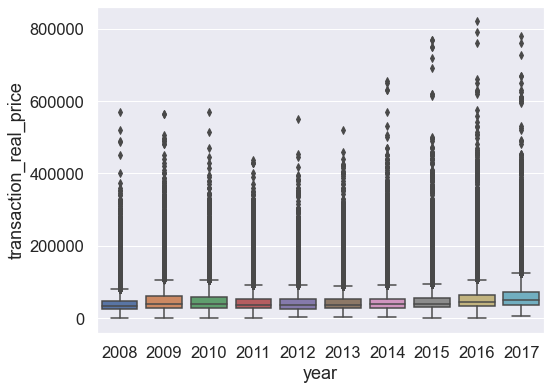

In [ ]:
f, ax = plt.subplots(figsize = (8,6))
sns.boxplot(df_train['year'], df_train['transaction_real_price'])
plt.show()

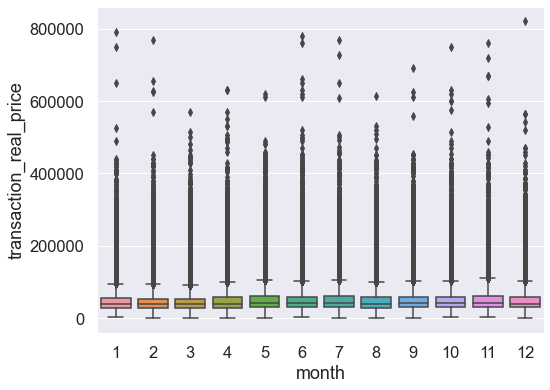

In [ ]:
f, ax = plt.subplots(figsize = (8,6))
sns.boxplot(df_train['month'], df_train['transaction_real_price'])
plt.show()

### year_of_completion : 설립일자

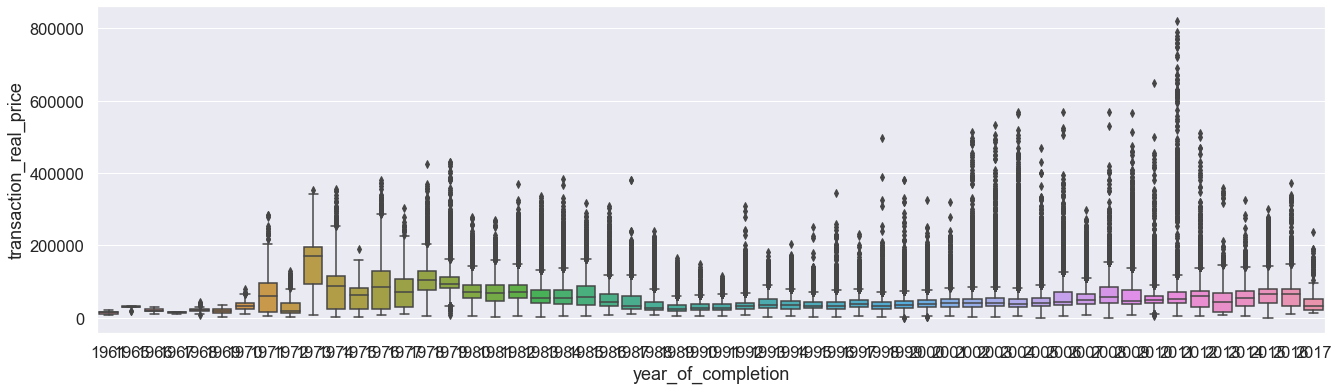

In [ ]:
f, ax = plt.subplots(figsize = (22,6))
sns.boxplot(df_train['year_of_completion'], df_train['transaction_real_price'])
plt.show()

### 2.3 Catergorical Variable (feature)

### addr_kr : 주소
다른 변수들과 중복되는 내용을 담고 있으므로 삭제

In [ ]:
df_train = df_train.drop('addr_kr', axis=1)
df_test = df_test.drop('addr_kr', axis=1)

### dong : 동
데이콘 튜토리얼 샘플코드에서 한강의 유무에 따른 feature를 하나 생성 해준다.

In [16]:
df_train['hangang']=df_train['dong'].isin(['성수동1가','삼성동','이촌동','공덕동','서교동','한강로3가','목동']).astype(int)
df_test['hangang']=df_test['dong'].isin(['성수동1가','삼성동','이촌동','공덕동','서교동','한강로3가','목동']).astype(int)

In [ ]:
len(df_train['dong'].unique())

330

dong별 아파트 실거래가 평균 내림차순

In [ ]:
df_train_dong = df_train[['transaction_real_price','dong']].groupby('dong').mean().sort_values('transaction_real_price',ascending=False).reset_index()
df_train_dong.head()

,dong,transaction_real_price
0,장충동1가,269888.888889
1,압구정동,164534.722914
2,청암동,161403.700000
3,용산동5가,153497.331633
4,회현동2가,139906.140351


### Jibun : 지번

In [ ]:
len(df_train['jibun'].unique())

6119

In [ ]:
df_train_jibun = df_train[['transaction_real_price','jibun']].groupby('jibun').mean().sort_values('transaction_real_price', ascending=False).reset_index()
df_train_jibun.head()

,jibun,transaction_real_price
0,128-18,530000.000000
1,1496-24,490000.000000
2,129-16,427125.000000
3,130-7,390702.882353
4,685-696,367399.154472


### apt : 아파트 단지 이름

In [ ]:
len(df_train['apt'].unique())

6917

In [ ]:
df_train_apt = df_train[['transaction_real_price','apt']].groupby('apt').mean().sort_values('transaction_real_price',ascending=False).reset_index()
df_train_apt.head()

,apt,transaction_real_price
0,상지리츠빌카일룸2차,530000.000000
1,트라움하우스3,490000.000000
2,아펠바움,465860.500000
3,상지리츠빌카일룸3차,427125.000000
4,삼성동상지리츠빌카일룸,418992.666667


### transaction_date : 거래 날짜

In [ ]:
len(df_train['transaction_date'].unique())

6

In [ ]:
df_train_date = df_train[['transaction_real_price','transaction_date']].groupby('transaction_date').mean().sort_values('transaction_real_price',ascending=False).reset_index()
df_train_date.head()

,transaction_date,transaction_real_price
0,21~30,50726.147638
1,21~31,49846.663000
2,11~20,49007.913348
3,1~10,48672.423850
4,21~28,47659.191556


### park 동별 파생변수 만들기

In [ ]:
df_train.head()

,apartment_id,city,dong,jibun,apt,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,year,month,hangang
0,7622,서울특별시,신교동,6-13,신현(101동),84.82,2002,200801,21~31,2,37500,2008,1,0
1,5399,서울특별시,필운동,142,사직파크맨션,99.17,1973,200801,1~10,6,20000,2008,1,0
2,3578,서울특별시,필운동,174-1,두레엘리시안,84.74,2007,200801,1~10,6,38500,2008,1,0
3,10957,서울특별시,내수동,95,파크팰리스,146.39,2003,200801,11~20,15,118000,2008,1,0
4,10639,서울특별시,내수동,110-15,킹스매너,194.43,2004,200801,21~31,3,120000,2008,1,0


In [ ]:
try:
    park = pd.read_csv('/content/drive/MyDrive/park.csv')
except:
    park = pd.read_csv('park.csv')
park.head()

,city,gu,dong,park_name,park_type,park_area,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other,park_open_year,reference_date
0,부산광역시,남구,대연동,대연공원,근린공원,55227.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14
1,부산광역시,남구,대연동,당곡공원,역사공원,75465.0,NaN,NaN,NaN,NaN,NaN,1944.0,2018-08-14
2,부산광역시,남구,대연동,대일어린이공원,어린이공원,422.1,NaN,NaN,NaN,NaN,NaN,1965.0,2018-08-14
3,부산광역시,남구,대연동,못골어린이공원,어린이공원,499.8,NaN,NaN,NaN,NaN,NaN,1968.0,2018-08-14
4,부산광역시,남구,용호동,솔밭어린이공원,어린이공원,1500.2,NaN,NaN,NaN,NaN,NaN,1970.0,2018-08-14


In [ ]:
print(park.shape)
park.info()

(1359, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1359 entries, 0 to 1358
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   city                         1359 non-null   object 
 1   gu                           1356 non-null   object 
 2   dong                         1359 non-null   object 
 3   park_name                    1359 non-null   object 
 4   park_type                    1359 non-null   object 
 5   park_area                    1359 non-null   float64
 6   park_exercise_facility       277 non-null    object 
 7   park_entertainment_facility  435 non-null    object 
 8   park_benefit_facility        266 non-null    object 
 9   park_cultural_facitiy        72 non-null     object 
 10  park_facility_other          175 non-null    object 
 11  park_open_year               937 non-null    float64
 12  reference_date               1359 non-null   object 
dtypes: floa

In [ ]:
busan = park[park['city'] == '부산광역시'].index
park=park.drop(busan)
print(park.shape)
park.head()

(930, 13)


,city,gu,dong,park_name,park_type,park_area,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other,park_open_year,reference_date
58,서울특별시,서초구,반포동,반 포,근린공원,26092.2,NaN,NaN,NaN,NaN,NaN,1981.0,2018-06-30
59,서울특별시,서초구,양재동,방아다리1,근린공원,2870.8,NaN,NaN,NaN,NaN,NaN,1988.0,2018-06-30
60,서울특별시,서초구,양재동,방아다리2,근린공원,2934.3,NaN,NaN,NaN,NaN,NaN,1988.0,2018-06-30
61,서울특별시,서초구,양재동,양재천,근린공원,19258.0,NaN,NaN,NaN,NaN,NaN,1988.0,2018-06-30
62,서울특별시,서초구,양재동,마 방,근린공원,6546.6,NaN,NaN,NaN,NaN,NaN,1983.0,2018-06-30


In [ ]:
park.shape

(930, 13)

In [ ]:
unique_dong = np.unique(df_train["dong"]) #park 데이터에 들어있지 않은 동은 0개로 처리해야 해서 df_train의 동 갯수를 불러옴
count_dong_park = []

for i in unique_dong:
  df_temp = park.query("dong=='%s'" %i)
  count_dong_park.append(df_temp['dong'].count()) #각 동별 공원의 갯수 세기

count_park_df = pd.DataFrame({'dong':unique_dong,'count_park':count_dong_park})

In [ ]:
count_park_df['count_park'].sum()

923

In [ ]:
#데이터 갯수가 일치하지 않아 park와 train의 동을 비교해 보기로함.

aa_train = np.unique(df_train['dong'])
aa_park = np.unique(park['dong'])

count = 0
for i in aa_park:
    if i not in aa_train:
        count += 1
        print(i)

count

청룡동


1

In [ ]:
#청룡동의 공원 갯수 확인
park[park['dong']=='청룡동']['dong'].count()

7

In [ ]:
#청룡동에서의 아파트 거래 건수 확인
df_train[df_train['dong']=='청룡동']['dong'].count()

0

In [ ]:
#실제 청룡동은 서울시 관악구에 있지만 거래 데이터가 없기 때문에 park 데이터에서 제외

cheong = park[park['dong'] == '청룡동'].index #청룡동에 대한 row 삭제
park=park.drop(cheong)
park.shape

#동별 공원 갯수 셌을 때와 같은 값 나옴

(923, 13)

In [ ]:
#이제 공원 갯수 순위 구해서 train 데이터에 적용
count_park_df['count_park_rank'] = count_park_df.count_park.rank(method='min')

In [ ]:
count_park_df.sort_values(['count_park_rank'])

,dong,count_park,count_park_rank
329,흥인동,0,1.0
155,성북동,0,1.0
156,성북동1가,0,1.0
157,성산동,0,1.0
159,성수동2가,0,1.0
...,...,...,...
88,마천동,19,326.0
109,문정동,20,327.0
196,양재동,21,328.0
116,방화동,25,329.0


In [ ]:
temp_dict = dict() #행정구역명과 공원 갯수를 딕셔너리로 저장
for (i,j) in enumerate(count_park_df['dong']):
    temp_dict[j] = count_park_df['count_park'][i]

df_train['count_park'] = df_train['dong']
df_train['count_park'] = df_train['count_park'].map(temp_dict) #동에다가 갯수를 매칭해서 덮어씌우도록 map적용
df_train['count_park'] = df_train['count_park'].astype(int)

In [ ]:
df_train

,apartment_id,city,dong,jibun,apt,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,year,month,hangang,count_park
0,7622,서울특별시,신교동,6-13,신현(101동),84.82,2002,200801,21~31,2,37500,2008,1,0,0
1,5399,서울특별시,필운동,142,사직파크맨션,99.17,1973,200801,1~10,6,20000,2008,1,0,0
2,3578,서울특별시,필운동,174-1,두레엘리시안,84.74,2007,200801,1~10,6,38500,2008,1,0,0
3,10957,서울특별시,내수동,95,파크팰리스,146.39,2003,200801,11~20,15,118000,2008,1,0,0
4,10639,서울특별시,내수동,110-15,킹스매너,194.43,2004,200801,21~31,3,120000,2008,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184014,996,서울특별시,강일동,717,고덕리엔파크2단지,59.72,2011,201711,11~20,9,53000,2017,11,0,9
1184015,682,서울특별시,강일동,674,강일리버파크3단지,59.87,2009,201711,21~30,12,53000,2017,11,0,9
1184016,682,서울특별시,강일동,674,강일리버파크3단지,84.74,2009,201711,21~30,3,56500,2017,11,0,9
1184017,680,서울특별시,강일동,665,강일리버파크1단지,84.74,2009,201711,21~30,9,55500,2017,11,0,9


In [ ]:
df_train['count_park'].unique()

array([ 0,  1,  2,  3,  4,  7,  5,  6, 13, 11,  9, 10, 14,  8, 16, 31, 25,
       15, 18, 21, 17, 12, 20, 19])

#### train 구 칼럼 추가하기

In [ ]:
len(park['dong'].unique())

161

In [ ]:
len(df_train['dong'].unique())

330

park의 동 갯수가 절반밖에 안돼서 새롭게 데이터 추가

서울 열린 데이터 광장 > 서울시 토지현황 (지목별/법정동별) 통계

In [ ]:
temp = pd.read_csv('/content/drive/MyDrive/report.txt', sep='\t')
temp.head(3)

In [ ]:
temp = pd.read_csv('report.txt', sep='\t')
temp.head(3)

,기간,자치구,법정동,토지현황(지목별),토지현황(지목별).1,토지현황(지목별).2,토지현황(지목별).3,토지현황(지목별).4,토지현황(지목별).5,토지현황(지목별).6,...,토지현황(지목별).16,토지현황(지목별).17,토지현황(지목별).18,토지현황(지목별).19,토지현황(지목별).20,토지현황(지목별).21,토지현황(지목별).22,토지현황(지목별).23,토지현황(지목별).24,토지현황(지목별).25
0,기간,자치구,법정동,합계,전,답,과수원,목장용지,임야,대지,...,구거,유지,수도용지,공원,체육용지,유원지,종교용지,사적지,묘지,잡종지
1,2021,합계,합계,"605,243,961.2","9,571,764.2","8,613,908.5","277,255.4",388,"137,876,641.4","222,144,293.9",...,"3,298,991.7","1,492,995.7","1,579,046.2","23,206,088.2","1,481,948.5","219,119.4","2,360,177.5","1,590,583.2","2,329,188.2","16,397,436.9"
2,2021,종로구,소계,"23,912,935.7","800,294.5",-,-,-,"9,359,338.5","8,181,175.0",...,"164,401.5",-,85.2,"319,676.0",-,-,"106,967.4","1,244,517.4","11,001.0","104,115.2"


0번 행 제거하고 합계랑 소계로 되어있는 행 제거

In [ ]:
temp = temp[['자치구','법정동']]
temp.drop(0, inplace=True)

In [ ]:
temp_index = temp[temp['자치구']=="합계"].index
temp.drop(temp_index, inplace=True)
temp_index = temp[temp['법정동']=="합계"].index
temp.drop(temp_index, inplace=True)
temp_index = temp[temp['법정동']=="소계"].index
temp.drop(temp_index, inplace=True)

column이름 변경

In [ ]:
temp.rename(columns={'법정동':'dong','자치구':'gu'},inplace=True)
temp.set_index('dong',inplace=True)

In [ ]:
temp = temp.to_dict()

In [ ]:
df_train['gu'] = df_train['dong']
df_train['gu'] = df_train['gu'].map(temp['gu'])
df_train

,apartment_id,city,dong,jibun,apt,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,transaction_real_price,year,month,hangang,count_park,gu
0,7622,서울특별시,신교동,6-13,신현(101동),84.82,2002,200801,21~31,2,37500,2008,1,0,0,종로구
1,5399,서울특별시,필운동,142,사직파크맨션,99.17,1973,200801,1~10,6,20000,2008,1,0,0,종로구
2,3578,서울특별시,필운동,174-1,두레엘리시안,84.74,2007,200801,1~10,6,38500,2008,1,0,0,종로구
3,10957,서울특별시,내수동,95,파크팰리스,146.39,2003,200801,11~20,15,118000,2008,1,0,0,종로구
4,10639,서울특별시,내수동,110-15,킹스매너,194.43,2004,200801,21~31,3,120000,2008,1,0,0,종로구
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184014,996,서울특별시,강일동,717,고덕리엔파크2단지,59.72,2011,201711,11~20,9,53000,2017,11,0,9,강동구
1184015,682,서울특별시,강일동,674,강일리버파크3단지,59.87,2009,201711,21~30,12,53000,2017,11,0,9,강동구
1184016,682,서울특별시,강일동,674,강일리버파크3단지,84.74,2009,201711,21~30,3,56500,2017,11,0,9,강동구
1184017,680,서울특별시,강일동,665,강일리버파크1단지,84.74,2009,201711,21~30,9,55500,2017,11,0,9,강동구


### park 구별 데이터 파생변수

In [ ]:
park.head(3)

,city,gu,dong,park_name,park_type,park_area,park_exercise_facility,park_entertainment_facility,park_benefit_facility,park_cultural_facitiy,park_facility_other,park_open_year,reference_date
58,서울특별시,서초구,반포동,반 포,근린공원,26092.2,NaN,NaN,NaN,NaN,NaN,1981.0,2018-06-30
59,서울특별시,서초구,양재동,방아다리1,근린공원,2870.8,NaN,NaN,NaN,NaN,NaN,1988.0,2018-06-30
60,서울특별시,서초구,양재동,방아다리2,근린공원,2934.3,NaN,NaN,NaN,NaN,NaN,1988.0,2018-06-30


In [ ]:
park_num = park[['gu','park_name']].groupby('gu').count().sort_values('gu').reset_index()
park_num = park_num.rename(columns={'park_name':'park_gu_count'})
park_num.head()

,gu,park_gu_count
0,강남구,132
1,강동구,23
2,강북구,9
3,강서구,109
4,관악구,14


In [ ]:
park_num.set_index('gu',inplace=True)


In [ ]:
park_num['park_gu_count'].astype(int)

gu
강남구     132
강동구      23
강북구       9
강서구     109
관악구      14
광진구      11
구로구      47
금천구      10
노원구       2
도봉구       2
동대문구     41
동작구      46
서대문구     50
서초구     107
성동구      23
송파구     147
양천구       1
영등포구      8
용산구      32
은평구      79
종로구       5
중구       14
중랑구      11
Name: park_gu_count, dtype: int32

In [ ]:
park_num = park_num.to_dict()

In [ ]:
df_train['count_gu_park'] = df_train['gu']
df_train['count_gu_park'] = df_train['count_gu_park'].map(park_num['park_gu_count'])

In [ ]:
df_train[['count_gu_park']].isnull().sum()

count_gu_park    63499
dtype: int64

In [ ]:
#시간 되면 호선 별 거리 별 역 있는지

#### park 개수에 따른 동별 실거래가

In [ ]:
park_num = df_train.loc[:, ['dong','transaction_real_price', 'count_park']]

unique_dong = np.unique(park_num["dong"])
unique_dong

array(['가락동', '가리봉동', '가산동', '가양동', '갈월동', '갈현동', '강일동', '개봉동', '개포동',
       '거여동', '견지동', '고덕동', '고척동', '공덕동', '공릉동', '공항동', '광장동', '교남동',
       '교북동', '구기동', '구로동', '구산동', '구수동', '구의동', '군자동', '궁동', '금호동1가',
       '금호동2가', '금호동3가', '금호동4가', '길동', '길음동', '낙원동', '남가좌동', '남대문로5가',
       '남산동2가', '남창동', '남현동', '내곡동', '내발산동', '내수동', '냉천동', '노고산동', '노량진동',
       '녹번동', '논현동', '누상동', '능동', '답십리동', '당산동', '당산동1가', '당산동2가',
       '당산동3가', '당산동4가', '당산동5가', '당산동6가', '당주동', '대림동', '대방동', '대조동',
       '대치동', '대현동', '대흥동', '도곡동', '도림동', '도봉동', '도선동', '도원동', '도화동',
       '독산동', '돈암동', '동교동', '동빙고동', '동선동1가', '동선동3가', '동선동4가', '동선동5가',
       '동소문동4가', '동소문동5가', '동소문동6가', '동소문동7가', '동숭동', '동자동', '동작동', '둔촌동',
       '등촌동', '마곡동', '마장동', '마천동', '마포동', '만리동1가', '만리동2가', '망우동', '망원동',
       '면목동', '명륜1가', '명륜2가', '명륜3가', '명일동', '목동', '무악동', '묵동', '묵정동',
       '문래동2가', '문래동3가', '문래동4가', '문래동5가', '문래동6가', '문배동', '문정동', '미근동',
       '미아동', '반포동', '방배동', '방이동', '방학동', '방화동', '번동', '보광동', '보문동2가

In [ ]:
mean_dong_df = df_train[['dong','transaction_real_price']].groupby('dong').mean().sort_values('transaction_real_price').reset_index()
mean_dong_df.rename(columns={'transaction_real_price':'mean_dong_price'},inplace=True)

In [ ]:
mean_dong_df

,dong,mean_dong_price
0,장충동2가,6628.421053
1,필동1가,8466.666667
2,누상동,10650.000000
3,영등포동3가,11515.652174
4,영등포동2가,12402.040816
...,...,...
325,회현동2가,139906.140351
326,용산동5가,153497.331633
327,청암동,161403.700000
328,압구정동,164534.722914


In [ ]:
# mean_dong_df['transaction_real_price'] = df_train['transaction_real_price']/
merge_inner = pd.merge(count_park_df,mean_dong_df)
merge_inner.sort_values(by = 'count_park_rank')

,dong,count_park,count_park_rank,mean_dong_price
329,흥인동,0,1.0,74039.456432
155,성북동,0,1.0,18747.027027
156,성북동1가,0,1.0,41638.000000
157,성산동,0,1.0,39997.691616
159,성수동2가,0,1.0,58204.548035
...,...,...,...,...
88,마천동,19,326.0,42425.215088
109,문정동,20,327.0,62182.640031
196,양재동,21,328.0,52965.720034
116,방화동,25,329.0,29972.402532


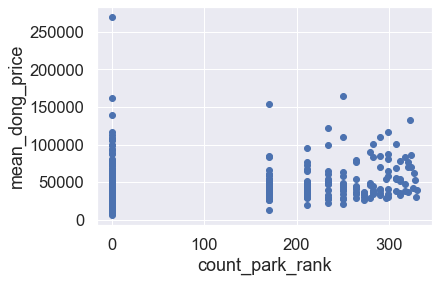

In [ ]:
plt.scatter(merge_inner['count_park_rank'], merge_inner['mean_dong_price'])
plt.xlabel('count_park_rank')
plt.ylabel('mean_dong_price')
plt.show()

In [ ]:
merge_inner.corr()

,count_park,count_park_rank,mean_dong_price
count_park,1.000000,0.774814,0.135173
count_park_rank,0.774814,1.000000,0.118786
mean_dong_price,0.135173,0.118786,1.000000


### 지하철 파생변수 만들기


In [ ]:
try:
    subway = pd.read_csv('subway_dist_code.csv')
except: 
    subway = pd.read_csv('subway_dist_code.csv')

subway.head()

,Unnamed: 0,역이름,y,x,호선,geometry
0,0,가락시장,37.492522,127.118234,"['03호선', '08호선']",POINT (127.118234 37.492522)
1,1,종로3가,37.571607,126.991806,"['01호선', '03호선', '05호선']",POINT (126.991806 37.571607)
2,2,오금,37.502162,127.128111,"['03호선', '05호선']",POINT (127.128111 37.502162)
3,3,동대문,37.571420,127.009745,"['01호선', '04호선']",POINT (127.009745 37.57142)
4,4,동대문역사문화공원,37.565138,127.007896,"['02호선', '04호선', '05호선']",POINT (127.007896 37.565138)


In [ ]:
df_train2 = pd.read_csv("train.csv")
busan = df_train2[df_train2['city'] == '부산광역시'].index
df_train2=df_train2.drop(busan)
df_train2 = df_train2[['apartment_id','addr_kr']]

In [ ]:
#아파트 번호가 같을 때 주소가 다른 데이터가 있는지 unique값 확인
a=0
for i in df_train2['apartment_id'].unique():
  if len(np.unique(df_train2[df_train2['apartment_id']==i]['addr_kr'])) > 1:
    a += 1
    print(i)
print(a)

0


In [ ]:
# apartment_addr = df_train2.groupby('apartment_id').first().sort_values('apartment_id',ascending=True).reset_index()
# apartment_addr.head()

In [ ]:
try:
    apartment_addr = pd.read_csv("/content/drive/MyDrive/apartment_addr.csv")
except:
    apartment_addr = pd.read_csv("apartment_addr.csv")
apartment_addr.head()

,apartment_id,addr_kr,lat,lng
0,0,행당동 1-10,37.561427,127.039210
1,1,명륜3가 1-102,37.589464,126.995256
2,2,한남동 1-35,37.535891,127.011677
3,3,진관동 101,37.632139,126.920108
4,4,진관동 102,37.633038,126.922288


아래의 코드는 api 이용 횟수에 제한이 있으므로 사용 시 주의

In [ ]:
# import requests
# import json


# apartment_addr['lat'] = 0
# apartment_addr['lng'] = 0
# a = 0

# # 데이터 가져오기
# for i in range(len(apartment_addr)):
#     a += 1
#     if a % 100 == 0:
#         print(a)

#     try:
#         # geocoder 호출
#         r = requests.get("http://api.vworld.kr/req/address?service=address&request=getcoord&version=2.0&crs=epsg:4326&address=" + apartment_addr['addr_kr'][i] + "&refine=true&simple=false&format=json&type=parcel&key=5487A850-A214-3BA4-9D49-35A3CD2BC66D")

#         # 데이터 추가
#         apartment_addr['lat'][i] = r.json()["response"]['result']['point']['y']
#         apartment_addr['lng'][i] = r.json()["response"]['result']['point']['x']
#     except:
#         pass

# apartment_addr.to_csv("apartment_addr.csv", mode='w')
# apartment_addr.head()

In [ ]:
apartment_addr[apartment_addr['lat'] == 0].count()

apartment_id    81
addr_kr         81
lat             81
lng             81
dtype: int64

In [ ]:
# 거리구해서 반경 1km이내에 있는 지하철역 개수 세기
# 환승역일 경우 노선 개수만큼 중복으로 더함
max_distance = 1 #km

temp = dict()

#변수 추가
for i in range(1,10):
    for j in [0.2,0.5,1]:
        temp["line" + str(i) + "_" + str(j) + "km"] = [0]

#임의의 row 하나 만들어둠
df_line = pd.DataFrame().from_dict(temp)
del temp

for i in range(apartment_addr.shape[0]):
    
    #변수가 9개 호선 3개의 거리 범위로 27개임
    line = [0]*27
    
    for j in range(subway.shape[0]):
        
        #거리 구하기
        aptY = float(apartment_addr['lat'][i])
        aptX = float(apartment_addr['lng'][i])
        
        subY = float(subway['y'][j])
        subX = float(subway['x'][j])
        
        deltaY = (aptY - subY) * 6400 * 2 * np.pi / 360
        deltaX = (aptX - subX) * 6400 * 2 * np.pi * np.cos(aptY) / 360
        
        if abs(deltaY) > max_distance or abs(deltaX) > max_distance:
            continue
        
        distance = np.sqrt(deltaX ** 2 + deltaY ** 2)
        
        #거리에 대한 인덱스 계산 표시
        if distance <= 0.2:
            index = 0
            
        elif distance <= 0.5:
            index = 1
            
        elif distance <= 1:
            index = 2
        
        #호선에 대한 정보 표시
        lines = subway['호선'][j]
        lines = lines.replace("[","")
        lines = lines.replace("]","")
        lines = lines.replace(" ","")
        lines = lines.split(",")
        for k in lines:
            a = int(k[2]) - 1
            line[a*3 + index] = 1

    df_line = df_line.append(df_line.iloc[-1], ignore_index=True)
    df_line.iloc[-1] = line

#임의로 만들어둔 행은 제거
df_line.drop(0,inplace=True)        
df_line.head()

,line1_0.2km,line1_0.5km,line1_1km,line2_0.2km,line2_0.5km,line2_1km,line3_0.2km,line3_0.5km,line3_1km,line4_0.2km,...,line6_1km,line7_0.2km,line7_0.5km,line7_1km,line8_0.2km,line8_0.5km,line8_1km,line9_0.2km,line9_0.5km,line9_1km
1,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_line = df_line.reset_index()
df_line.drop('index',axis=1,inplace=True)
df_line.astype(int)

,line1_0.2km,line1_0.5km,line1_1km,line2_0.2km,line2_0.5km,line2_1km,line3_0.2km,line3_0.5km,line3_1km,line4_0.2km,...,line6_1km,line7_0.2km,line7_0.5km,line7_1km,line8_0.2km,line8_0.5km,line8_1km,line9_0.2km,line9_0.5km,line9_1km
0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8246,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8247,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8248,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8249,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
apartment_addr = pd.concat([apartment_addr,df_line],axis=1)

In [ ]:
apartment_addr

,apartment_id,addr_kr,lat,lng,line1_0.2km,line1_0.5km,line1_1km,line2_0.2km,line2_0.5km,line2_1km,...,line6_1km,line7_0.2km,line7_0.5km,line7_1km,line8_0.2km,line8_0.5km,line8_1km,line9_0.2km,line9_0.5km,line9_1km
0,0,행당동 1-10,37.561427,127.039210,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,명륜3가 1-102,37.589464,126.995256,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,한남동 1-35,37.535891,127.011677,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,진관동 101,37.632139,126.920108,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,진관동 102,37.633038,126.922288,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8246,12654,후암동 244-88,37.549406,126.978228,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8247,12655,반포동 577-79,37.493554,127.001104,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
8248,12656,방배동 802-3,37.493293,126.995482,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
8249,12657,동빙고동 1-30,37.526971,126.996401,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
apartment_addr[apartment_addr['line1_0.2km']==1]

,apartment_id,addr_kr,lat,lng,line1_0.2km,line1_0.5km,line1_1km,line2_0.2km,line2_0.5km,line2_1km,...,line6_1km,line7_0.2km,line7_0.5km,line7_1km,line8_0.2km,line8_0.5km,line8_1km,line9_0.2km,line9_0.5km,line9_1km
36,45,창신동 436-79,37.570071,127.010647,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
42,52,창신동 578-5 (578-5)201호,37.572368,127.011049,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
723,905,제기동 892-68,37.579183,127.035580,1,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1970,3077,창신동 578-5,37.572368,127.011049,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1971,3078,창신동 436-79,37.570071,127.010647,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
1973,3080,창신동 328-17,37.572265,127.015190,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3744,5782,숭인동 296-19,37.572354,127.016733,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
3746,5784,숭인동 318-2,37.571352,127.016717,1,0,1,0,0,1,...,1,0,0,0,0,0,0,0,0,0
5153,7972,제기동 1158-40,37.578817,127.033702,1,0,0,1,0,1,...,1,0,0,0,0,0,0,0,0,0
6568,10147,창신동 703,37.580227,127.011758,1,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [ ]:
apartment_addr.set_index('apartment_id',inplace=True)

In [ ]:
apartment_addr.drop(['addr_kr','lat','lng'],axis=1,inplace=True)
apartment_addr

,line1_0.2km,line1_0.5km,line1_1km,line2_0.2km,line2_0.5km,line2_1km,line3_0.2km,line3_0.5km,line3_1km,line4_0.2km,...,line6_1km,line7_0.2km,line7_0.5km,line7_1km,line8_0.2km,line8_0.5km,line8_1km,line9_0.2km,line9_0.5km,line9_1km
apartment_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12654,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12655,0,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
12656,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [ ]:
for i in apartment_addr.columns:
    temp = apartment_addr[[i]].to_dict()
    df_train[i] = df_train['apartment_id']
    df_train[i] = df_train[i].map(temp[i])

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742285 entries, 0 to 1184018
Data columns (total 44 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   apartment_id            742285 non-null  int64  
 1   city                    742285 non-null  object 
 2   dong                    742285 non-null  object 
 3   jibun                   742285 non-null  object 
 4   apt                     742285 non-null  object 
 5   exclusive_use_area      742285 non-null  float64
 6   year_of_completion      742285 non-null  int64  
 7   transaction_year_month  742285 non-null  int32  
 8   transaction_date        742285 non-null  object 
 9   floor                   742285 non-null  int64  
 10  transaction_real_price  742285 non-null  int64  
 11  year                    742285 non-null  int32  
 12  month                   742285 non-null  int32  
 13  hangang                 742285 non-null  int32  
 14  count_park         

###  어린이집 파생변수 만들기

In [ ]:
try:
    day_care_center = pd.read_csv('/content/drive/MyDrive/day_care_center.csv')
except:
    day_care_center = pd.read_csv('day_care_center.csv')
day_care_center.shape

(7551, 11)

In [ ]:
busan = day_care_center[day_care_center['city'] == '부산광역시'].index
day_care_center=day_care_center.drop(busan)
day_care_center.shape

(5656, 11)

In [ ]:
day_care_center.head(3)

,city,gu,day_care_name,day_care_type,day_care_baby_num,teacher_num,nursing_room_num,playground_num,CCTV_num,is_commuting_vehicle,reference_date
0,서울특별시,서대문구,가람어린이집,국공립,70,11.0,5.0,1.0,7.0,N,2018-07-31
1,서울특별시,서대문구,가좌제일어린이집,국공립,88,22.0,5.0,2.0,10.0,N,2018-07-31
2,서울특별시,서대문구,경찰청어린이집,직장,90,23.0,6.0,1.0,32.0,N,2018-07-31


In [ ]:
day_care_center_num = day_care_center[['gu','city']].groupby('gu').count()
day_care_center_num.head(3)

,city
gu,
강남구,223
강동구,272
강북구,167


In [ ]:
day_care_center_num = day_care_center_num.to_dict()

In [ ]:
df_train['count_gu_daycare'] = df_train['gu']
df_train['count_gu_daycare'] = df_train['count_gu_daycare'].map(day_care_center_num['city'])
df_train

,apartment_id,city,dong,jibun,apt,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,...,line7_0.2km,line7_0.5km,line7_1km,line8_0.2km,line8_0.5km,line8_1km,line9_0.2km,line9_0.5km,line9_1km,count_gu_daycare
0,7622,서울특별시,신교동,6-13,신현(101동),84.82,2002,200801,21~31,2,...,0,0,0,0,0,0,0,0,0,78.0
1,5399,서울특별시,필운동,142,사직파크맨션,99.17,1973,200801,1~10,6,...,0,0,0,0,0,0,0,0,0,78.0
2,3578,서울특별시,필운동,174-1,두레엘리시안,84.74,2007,200801,1~10,6,...,0,0,0,0,0,0,0,0,0,78.0
3,10957,서울특별시,내수동,95,파크팰리스,146.39,2003,200801,11~20,15,...,0,0,0,0,0,0,0,0,0,78.0
4,10639,서울특별시,내수동,110-15,킹스매너,194.43,2004,200801,21~31,3,...,0,0,0,0,0,0,0,0,0,78.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1184014,996,서울특별시,강일동,717,고덕리엔파크2단지,59.72,2011,201711,11~20,9,...,0,0,0,0,0,0,0,0,0,272.0
1184015,682,서울특별시,강일동,674,강일리버파크3단지,59.87,2009,201711,21~30,12,...,0,0,0,0,0,0,0,0,0,272.0
1184016,682,서울특별시,강일동,674,강일리버파크3단지,84.74,2009,201711,21~30,3,...,0,0,0,0,0,0,0,0,0,272.0
1184017,680,서울특별시,강일동,665,강일리버파크1단지,84.74,2009,201711,21~30,9,...,0,0,0,0,0,0,0,0,0,272.0


### 가중치 설정하기

In [ ]:
# 100 단위로 반올림 후 100 나눠줌 = transaction_year_month에서 month 분리
transaction_year = df_train['transaction_year_month'].round(-2) / 100
transaction_year = transaction_year.astype(int)

In [ ]:
df_train['transaction_year']=transaction_year

In [ ]:
### 재개발 예정인지 가중치 줌. 
### 35를 상한선으로 잡은것은 이 이상이 되면 재개발 될 거라는 심리가 떨어져서 임. 25-30 30-35 세개 만들어서 설명력 높은 2개만 살리기
df_train['weight2530'] = 0
df_train['weight3035'] = 0
df_train['weight2535'] = 0
df_train.loc[((df_train['transaction_year']-df_train['year_of_completion']) >= 25) & ((df_train['transaction_year']-df_train['year_of_completion']) < 30),'weight2530'] = 1
df_train.loc[((df_train['transaction_year']-df_train['year_of_completion']) >= 30) & ((df_train['transaction_year']-df_train['year_of_completion']) < 35),'weight3035'] = 1
df_train.loc[((df_train['transaction_year']-df_train['year_of_completion']) >= 25) & ((df_train['transaction_year']-df_train['year_of_completion']) < 35),'weight2535'] = 1

df_train.head()

,apartment_id,city,dong,jibun,apt,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,...,line8_0.5km,line8_1km,line9_0.2km,line9_0.5km,line9_1km,count_gu_daycare,transaction_year,weight2530,weight3035,weight2535
0,7622,서울특별시,신교동,6-13,신현(101동),84.82,2002,200801,21~31,2,...,0,0,0,0,0,78.0,2008,0,0,0
1,5399,서울특별시,필운동,142,사직파크맨션,99.17,1973,200801,1~10,6,...,0,0,0,0,0,78.0,2008,0,0,0
2,3578,서울특별시,필운동,174-1,두레엘리시안,84.74,2007,200801,1~10,6,...,0,0,0,0,0,78.0,2008,0,0,0
3,10957,서울특별시,내수동,95,파크팰리스,146.39,2003,200801,11~20,15,...,0,0,0,0,0,78.0,2008,0,0,0
4,10639,서울특별시,내수동,110-15,킹스매너,194.43,2004,200801,21~31,3,...,0,0,0,0,0,78.0,2008,0,0,0


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742285 entries, 0 to 1184018
Data columns (total 49 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   apartment_id            742285 non-null  int64  
 1   city                    742285 non-null  object 
 2   dong                    742285 non-null  object 
 3   jibun                   742285 non-null  object 
 4   apt                     742285 non-null  object 
 5   exclusive_use_area      742285 non-null  float64
 6   year_of_completion      742285 non-null  int64  
 7   transaction_year_month  742285 non-null  int32  
 8   transaction_date        742285 non-null  object 
 9   floor                   742285 non-null  int64  
 10  transaction_real_price  742285 non-null  int64  
 11  year                    742285 non-null  int32  
 12  month                   742285 non-null  int32  
 13  hangang                 742285 non-null  int32  
 14  count_park         

In [ ]:
df_train['house_age'] = df_train['transaction_year'] - df_train['year_of_completion']

In [ ]:
Negatif = df_train[df_train['house_age'] < 0]
Negatif

,apartment_id,city,dong,jibun,apt,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,...,line8_1km,line9_0.2km,line9_0.5km,line9_1km,count_gu_daycare,transaction_year,weight2530,weight3035,weight2535,house_age
134850,6545,서울특별시,미아동,318-5,성북프라자,68.675,2009,200806,1~10,8,...,0,0,0,0,167.0,2008,0,0,0,-1
134999,6545,서울특별시,미아동,318-5,성북프라자,68.675,2009,200808,1~10,8,...,0,0,0,0,167.0,2008,0,0,0,-1
135026,6545,서울특별시,미아동,318-5,성북프라자,68.675,2009,200808,11~20,9,...,0,0,0,0,167.0,2008,0,0,0,-1


In [ ]:
df_train.loc[df_train['house_age'] < 0,'house_age'] = 0
df_train.head()

,apartment_id,city,dong,jibun,apt,exclusive_use_area,year_of_completion,transaction_year_month,transaction_date,floor,...,line8_1km,line9_0.2km,line9_0.5km,line9_1km,count_gu_daycare,transaction_year,weight2530,weight3035,weight2535,house_age
0,7622,서울특별시,신교동,6-13,신현(101동),84.82,2002,200801,21~31,2,...,0,0,0,0,78.0,2008,0,0,0,6
1,5399,서울특별시,필운동,142,사직파크맨션,99.17,1973,200801,1~10,6,...,0,0,0,0,78.0,2008,0,0,0,35
2,3578,서울특별시,필운동,174-1,두레엘리시안,84.74,2007,200801,1~10,6,...,0,0,0,0,78.0,2008,0,0,0,1
3,10957,서울특별시,내수동,95,파크팰리스,146.39,2003,200801,11~20,15,...,0,0,0,0,78.0,2008,0,0,0,5
4,10639,서울특별시,내수동,110-15,킹스매너,194.43,2004,200801,21~31,3,...,0,0,0,0,78.0,2008,0,0,0,4


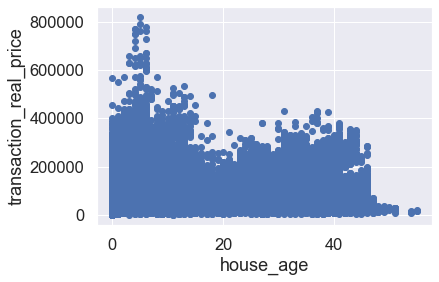

In [ ]:
plt.scatter(df_train['house_age'], df_train['transaction_real_price'])
plt.xlabel('house_age')
plt.ylabel('transaction_real_price')
plt.show()

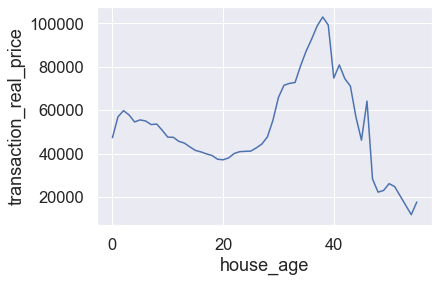

In [ ]:
data = df_train[['house_age','transaction_real_price']].groupby('house_age').mean().sort_values('house_age').reset_index()
plt.plot(data['house_age'],data['transaction_real_price'])
plt.xlabel('house_age')
plt.ylabel('transaction_real_price')
del data

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742285 entries, 0 to 1184018
Data columns (total 50 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   apartment_id            742285 non-null  int64  
 1   city                    742285 non-null  object 
 2   dong                    742285 non-null  object 
 3   jibun                   742285 non-null  object 
 4   apt                     742285 non-null  object 
 5   exclusive_use_area      742285 non-null  float64
 6   year_of_completion      742285 non-null  int64  
 7   transaction_year_month  742285 non-null  int32  
 8   transaction_date        742285 non-null  object 
 9   floor                   742285 non-null  int64  
 10  transaction_real_price  742285 non-null  int64  
 11  year                    742285 non-null  int32  
 12  month                   742285 non-null  int32  
 13  hangang                 742285 non-null  int32  
 14  count_park         

### 쓰이지 않거나 가공에 사용된 변수 삭제

In [ ]:
#city, jibun, apt에 대해 drop
df_train.drop(['city','jibun','apt'],axis=1,inplace=True)

In [ ]:
df_train.drop(['year_of_completion','transaction_year_month','transaction_year'],axis=1,inplace=True)

### 결측치 제거

In [ ]:
#어린이집 및 공원 갯수 변수에 대해 널값 제거후 정수형으로 변환
df_train.loc[df_train['count_gu_daycare'].isnull(),'count_gu_daycare'] = 0
df_train.loc[df_train['count_gu_park'].isnull(),'count_gu_park'] = 0

In [ ]:
df_train['count_gu_daycare'].isnull().sum()

0

In [ ]:
df_train['count_gu_park'].isnull().sum()

0

In [ ]:
df_train['count_gu_daycare'] = df_train['count_gu_daycare'].astype(int)
df_train['count_gu_park'] = df_train['count_gu_park'].astype(int)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742285 entries, 0 to 1184018
Data columns (total 44 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   apartment_id            742285 non-null  int64  
 1   dong                    742285 non-null  object 
 2   exclusive_use_area      742285 non-null  float64
 3   transaction_date        742285 non-null  object 
 4   floor                   742285 non-null  int64  
 5   transaction_real_price  742285 non-null  int64  
 6   year                    742285 non-null  int32  
 7   month                   742285 non-null  int32  
 8   hangang                 742285 non-null  int32  
 9   count_park              742285 non-null  int32  
 10  gu                      742285 non-null  object 
 11  count_gu_park           742285 non-null  int32  
 12  line1_0.2km             742285 non-null  int64  
 13  line1_0.5km             742285 non-null  int64  
 14  line1_1km          

In [ ]:
df_train.to_csv('final_train.csv')

### 범주형 변수 인코딩

In [ ]:
#여기서부터 다시 시작

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

plt.style.use('seaborn')
sns.set(font_scale=1.5) # 이 두줄은 본 필자가 항상 쓰는 방법입니다. matplotlib 의 기본 scheme 말고 seaborn scheme 을 세팅하고, 일일이 graph 의 font size 를 지정할 필요 없이 seaborn 의 font_scale 을 사용하면 편합니다.

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [ ]:
df_train = pd.read_csv('final_train.csv')

In [ ]:
#기존의 인덱스가 변수처럼 인식되므로 삭제
df_train.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742285 entries, 0 to 742284
Data columns (total 44 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   apartment_id            742285 non-null  int64  
 1   dong                    742285 non-null  object 
 2   exclusive_use_area      742285 non-null  float64
 3   transaction_date        742285 non-null  object 
 4   floor                   742285 non-null  int64  
 5   transaction_real_price  742285 non-null  int64  
 6   year                    742285 non-null  int64  
 7   month                   742285 non-null  int64  
 8   hangang                 742285 non-null  int64  
 9   count_park              742285 non-null  int64  
 10  gu                      742285 non-null  object 
 11  count_gu_park           742285 non-null  int64  
 12  line1_0.2km             742285 non-null  int64  
 13  line1_0.5km             742285 non-null  int64  
 14  line1_1km           

#### 1. 동(dong)

##### 동별 집값의 평균 순서로 labeling(label encoding)

In [ ]:
df_train_dong = df_train[['transaction_real_price','dong']].groupby('dong').mean().sort_values('transaction_real_price',ascending=False).reset_index()
df_train_dong['mean_price_label'] = df_train_dong['transaction_real_price'].rank(ascending=True)
df_train_dong['mean_price_label'] = df_train_dong['mean_price_label'].astype(int)
df_train_dong = df_train_dong[['dong','mean_price_label']].set_index('dong')
dong_label = df_train_dong.to_dict()

In [ ]:
dong_label

{'mean_price_label': {'장충동1가': 330,
  '압구정동': 329,
  '청암동': 328,
  '용산동5가': 327,
  '회현동2가': 326,
  '반포동': 325,
  '한남동': 324,
  '서빙고동': 323,
  '대치동': 322,
  '남대문로5가': 321,
  '도곡동': 320,
  '청담동': 319,
  '교남동': 318,
  '내수동': 317,
  '주성동': 316,
  '하중동': 315,
  '삼성동': 314,
  '잠실동': 313,
  '동자동': 312,
  '동빙고동': 311,
  '회현동1가': 310,
  '한강로3가': 309,
  '여의도동': 308,
  '사직동': 307,
  '이촌동': 306,
  '서교동': 305,
  '견지동': 304,
  '잠원동': 303,
  '방배동': 302,
  '신천동': 301,
  '신계동': 300,
  '자곡동': 299,
  '서초동': 298,
  '한강로1가': 297,
  '원효로1가': 296,
  '방이동': 295,
  '내곡동': 294,
  '상수동': 293,
  '일원동': 292,
  '상왕십리동': 291,
  '신원동': 290,
  '개포동': 289,
  '이태원동': 288,
  '흥인동': 287,
  '율현동': 286,
  '평창동': 285,
  '한강로2가': 284,
  '역삼동': 283,
  '우면동': 282,
  '논현동': 281,
  '세곡동': 280,
  '목동': 279,
  '동작동': 278,
  '아현동': 277,
  '성수동1가': 276,
  '용강동': 275,
  '보광동': 274,
  '금호동2가': 273,
  '옥인동': 272,
  '송파동': 271,
  '광장동': 270,
  '옥수동': 269,
  '청운동': 268,
  '흑석동': 267,
  '문정동': 266,
  '필운동': 265,
  '둔촌동': 264,
  '정동': 263,


In [ ]:
df_train['dong'] = df_train['dong'].map(dong_label['mean_price_label'])
df_train.head()

,apartment_id,dong,exclusive_use_area,transaction_date,floor,transaction_real_price,year,month,hangang,count_park,...,line8_0.5km,line8_1km,line9_0.2km,line9_0.5km,line9_1km,count_gu_daycare,weight2530,weight3035,weight2535,house_age
0,7622,193,84.82,21~31,2,37500,2008,1,0,0,...,0,0,0,0,0,78,0,0,0,6
1,5399,265,99.17,1~10,6,20000,2008,1,0,0,...,0,0,0,0,0,78,0,0,0,35
2,3578,265,84.74,1~10,6,38500,2008,1,0,0,...,0,0,0,0,0,78,0,0,0,1
3,10957,317,146.39,11~20,15,118000,2008,1,0,0,...,0,0,0,0,0,78,0,0,0,5
4,10639,317,194.43,21~31,3,120000,2008,1,0,0,...,0,0,0,0,0,78,0,0,0,4


#### 2. 거래일자(transaction_date)

##### 거래 시작일을 기준으로 labeling(label encoding)

In [ ]:
df_train['transaction_date'].unique()

array(['21~31', '1~10', '11~20', '21~29', '21~30', '21~28'], dtype=object)

In [ ]:
df_train_date = df_train[['transaction_date','transaction_real_price']]
df_train_date['start_date'] = df_train_date['transaction_date'].str.extract('(\d+~)')[0].str[:-1]
df_train_date.head()

,transaction_date,transaction_real_price,start_date
0,21~31,37500,21
1,1~10,20000,1
2,1~10,38500,1
3,11~20,118000,11
4,21~31,120000,21


In [ ]:
date_label = df_train_date[['transaction_date','start_date']].groupby('transaction_date').first().rank(method='min')
date_label = date_label.astype(int)
date_label = date_label.to_dict()

In [ ]:
date_label

{'start_date': {'11~20': 2,
  '1~10': 1,
  '21~28': 3,
  '21~29': 3,
  '21~30': 3,
  '21~31': 3}}

In [ ]:
df_train['transaction_date'] = df_train['transaction_date'].map(date_label['start_date'])
df_train.head()

,apartment_id,dong,exclusive_use_area,transaction_date,floor,transaction_real_price,year,month,hangang,count_park,...,line8_0.5km,line8_1km,line9_0.2km,line9_0.5km,line9_1km,count_gu_daycare,weight2530,weight3035,weight2535,house_age
0,7622,193,84.82,3,2,37500,2008,1,0,0,...,0,0,0,0,0,78,0,0,0,6
1,5399,265,99.17,1,6,20000,2008,1,0,0,...,0,0,0,0,0,78,0,0,0,35
2,3578,265,84.74,1,6,38500,2008,1,0,0,...,0,0,0,0,0,78,0,0,0,1
3,10957,317,146.39,2,15,118000,2008,1,0,0,...,0,0,0,0,0,78,0,0,0,5
4,10639,317,194.43,3,3,120000,2008,1,0,0,...,0,0,0,0,0,78,0,0,0,4


#### 3.구(gu)

##### 구별 집값의 평균 순서로 labeling(label encoding)

In [ ]:
df_train_gu = df_train[['transaction_real_price','gu']].groupby('gu').mean().sort_values('transaction_real_price',ascending=False).reset_index()
df_train_gu['mean_price_label'] = df_train_gu['transaction_real_price'].rank(ascending=True)
df_train_gu['mean_price_label'] = df_train_gu['mean_price_label'].astype(int)
df_train_gu = df_train_gu[['gu','mean_price_label']].set_index('gu')
gu_label = df_train_gu.to_dict()

In [ ]:
gu_label

{'mean_price_label': {'서초구': 25,
  '강남구': 24,
  '용산구': 23,
  '송파구': 22,
  '광진구': 21,
  '중구': 20,
  '성동구': 19,
  '마포구': 18,
  '동작구': 17,
  '양천구': 16,
  '종로구': 15,
  '강동구': 14,
  '영등포구': 13,
  '서대문구': 12,
  '은평구': 11,
  '성북구': 10,
  '동대문구': 9,
  '강서구': 8,
  '관악구': 7,
  '구로구': 6,
  '강북구': 5,
  '중랑구': 4,
  '노원구': 3,
  '도봉구': 2,
  '금천구': 1}}

In [ ]:
df_train['gu'] = df_train['gu'].map(gu_label['mean_price_label'])
df_train.head()

,apartment_id,dong,exclusive_use_area,transaction_date,floor,transaction_real_price,year,month,hangang,count_park,...,line8_0.5km,line8_1km,line9_0.2km,line9_0.5km,line9_1km,count_gu_daycare,weight2530,weight3035,weight2535,house_age
0,7622,193,84.82,3,2,37500,2008,1,0,0,...,0,0,0,0,0,78,0,0,0,6
1,5399,265,99.17,1,6,20000,2008,1,0,0,...,0,0,0,0,0,78,0,0,0,35
2,3578,265,84.74,1,6,38500,2008,1,0,0,...,0,0,0,0,0,78,0,0,0,1
3,10957,317,146.39,2,15,118000,2008,1,0,0,...,0,0,0,0,0,78,0,0,0,5
4,10639,317,194.43,3,3,120000,2008,1,0,0,...,0,0,0,0,0,78,0,0,0,4


In [ ]:
#동이랑 구에 대해 레이블 인코딩, 원핫인코딩 둘다 돌려보기
#캣부스트도 해보기

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 742285 entries, 0 to 742284
Data columns (total 44 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   apartment_id            742285 non-null  int64  
 1   dong                    742285 non-null  int64  
 2   exclusive_use_area      742285 non-null  float64
 3   transaction_date        742285 non-null  int64  
 4   floor                   742285 non-null  int64  
 5   transaction_real_price  742285 non-null  int64  
 6   year                    742285 non-null  int64  
 7   month                   742285 non-null  int64  
 8   hangang                 742285 non-null  int64  
 9   count_park              742285 non-null  int64  
 10  gu                      742285 non-null  int64  
 11  count_gu_park           742285 non-null  int64  
 12  line1_0.2km             742285 non-null  int64  
 13  line1_0.5km             742285 non-null  int64  
 14  line1_1km           

In [ ]:
df_train.to_csv('final_train_labelencoding.csv')